In [1]:
!pip install xgboost
!pip install optuna
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna
# Load the datasets
train_data = pd.read_csv('train.csv')  # Replace with the path to your train.csv file
test_data = pd.read_csv('test.csv')    # Replace with the path to your test.csv file


In [3]:
# Display the first few rows of the train dataset
print("Train dataset head:")
print(train_data.head())

Train dataset head:
   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  


In [4]:
# Display the shape of the train dataset
print("\nTrain dataset shape:", train_data.shape)


Train dataset shape: (90615, 10)


In [5]:

# Display the first few rows of the test dataset
print("\nTest dataset head:")
print(test_data.head())


Test dataset head:
      id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050  


In [6]:

# Display the shape of the test dataset
print("\nTest dataset shape:", test_data.shape)


Test dataset shape: (60411, 9)


In [7]:
# Check for missing values in both datasets
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()

# Summary statistics for numerical features in the training data
summary_statistics_train = train_data.describe()

# Categorical data exploration for 'Sex' column in the training data
sex_distribution_train = train_data['Sex'].value_counts()




In [8]:
# Print out the results
print("Missing Values in Training Data:\n", missing_values_train)
print("\nMissing Values in Test Data:\n", missing_values_test)

Missing Values in Training Data:
 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

Missing Values in Test Data:
 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


In [9]:
print("\nSummary Statistics for Training Data:\n", summary_statistics_train)
print("\nDistribution of 'Sex' in Training Data:\n", sex_distribution_train)



Summary Statistics for Training Data:
                  id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0

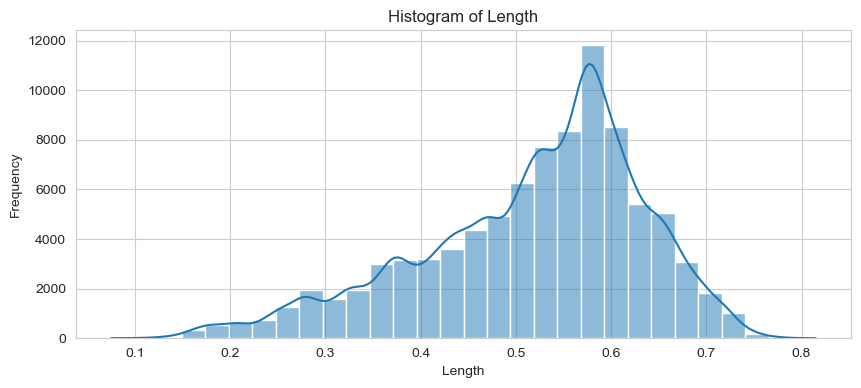

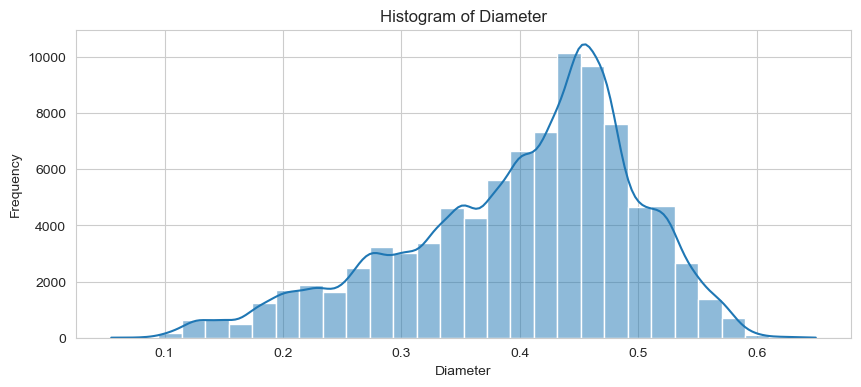

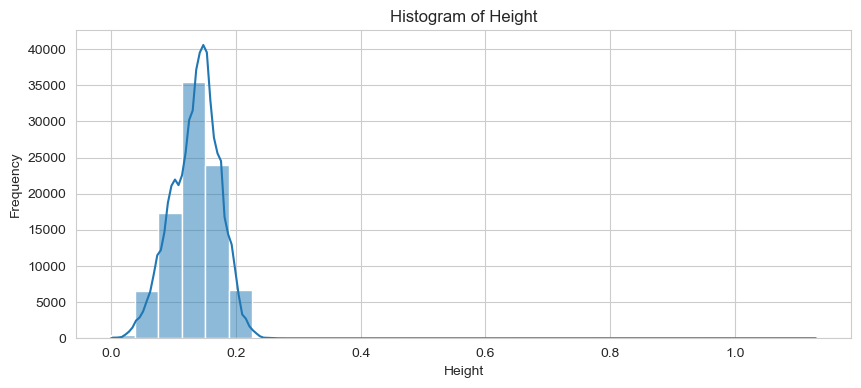

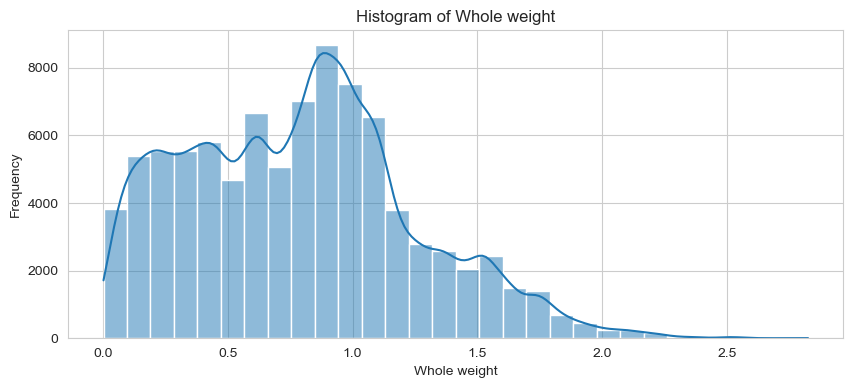

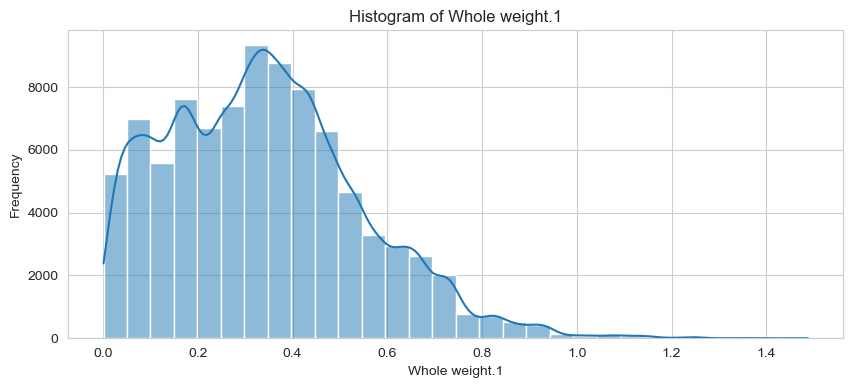

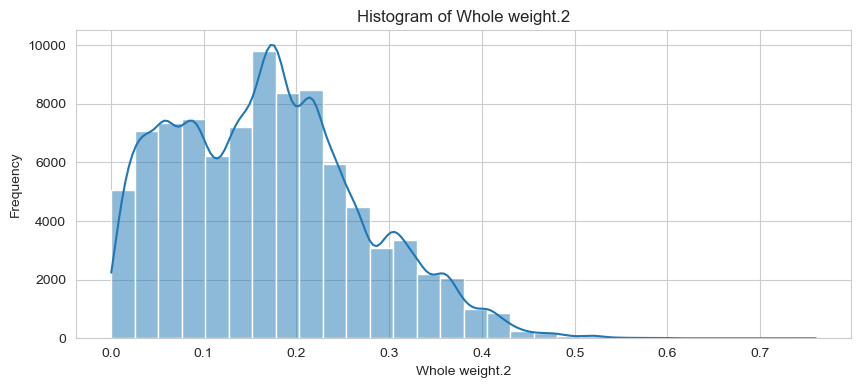

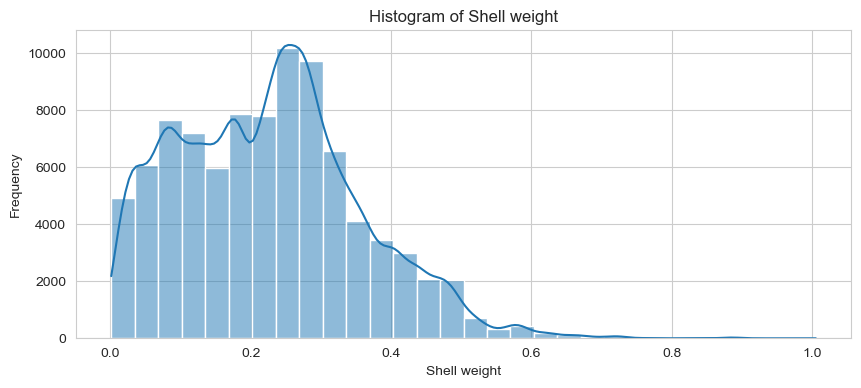

In [10]:
 #Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for all numerical features
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(train_data[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

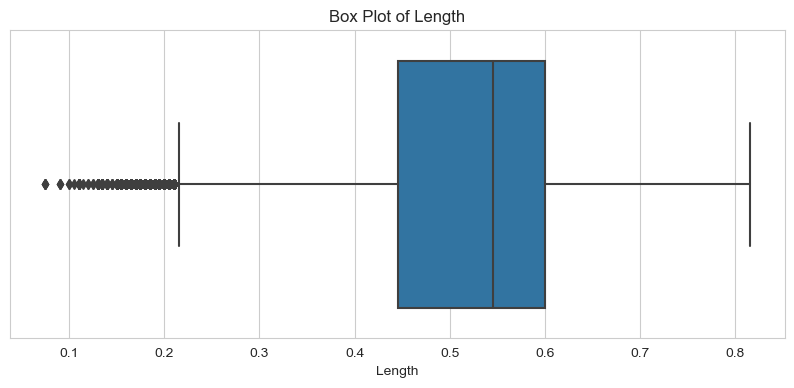

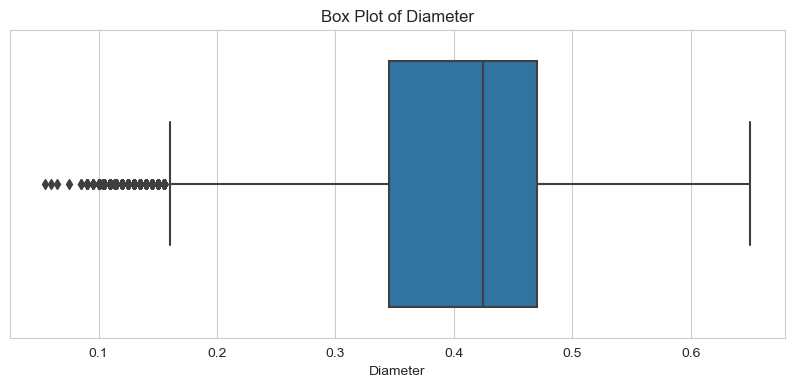

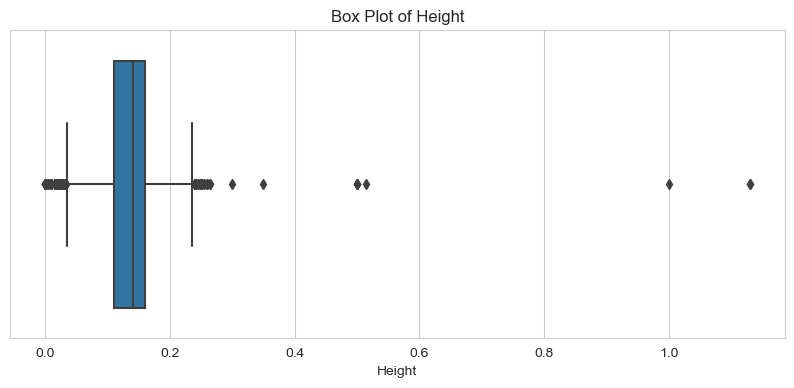

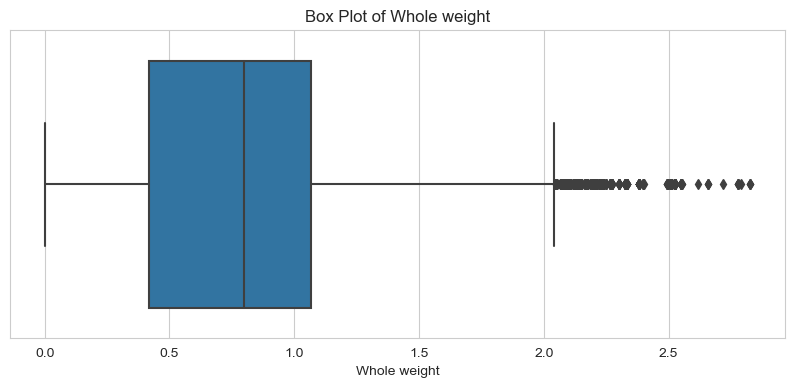

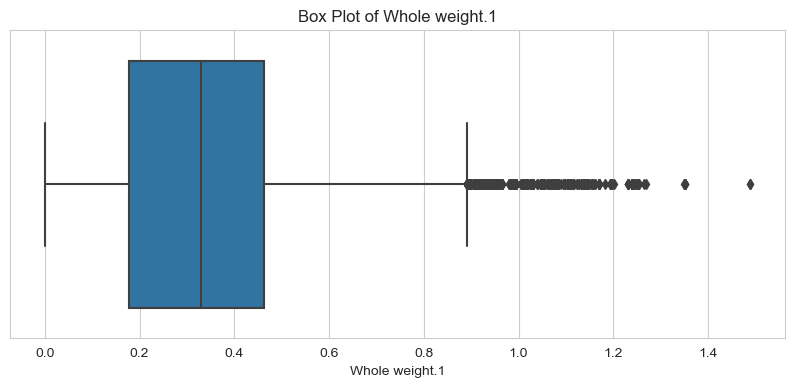

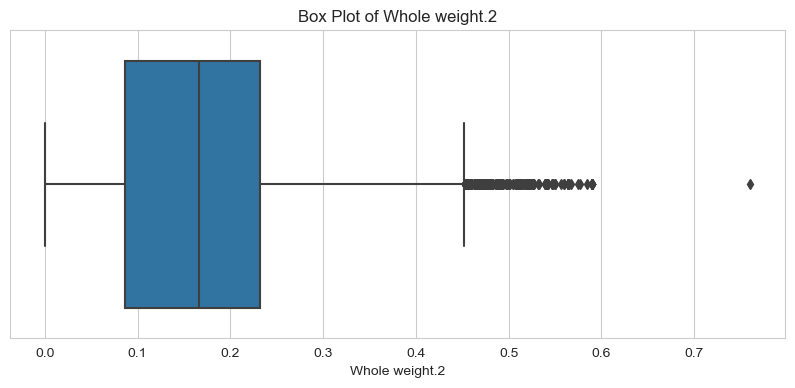

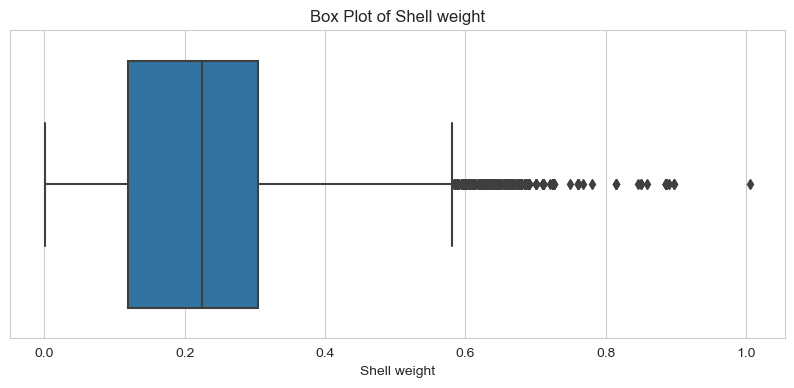

In [11]:
# Box plots for all numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

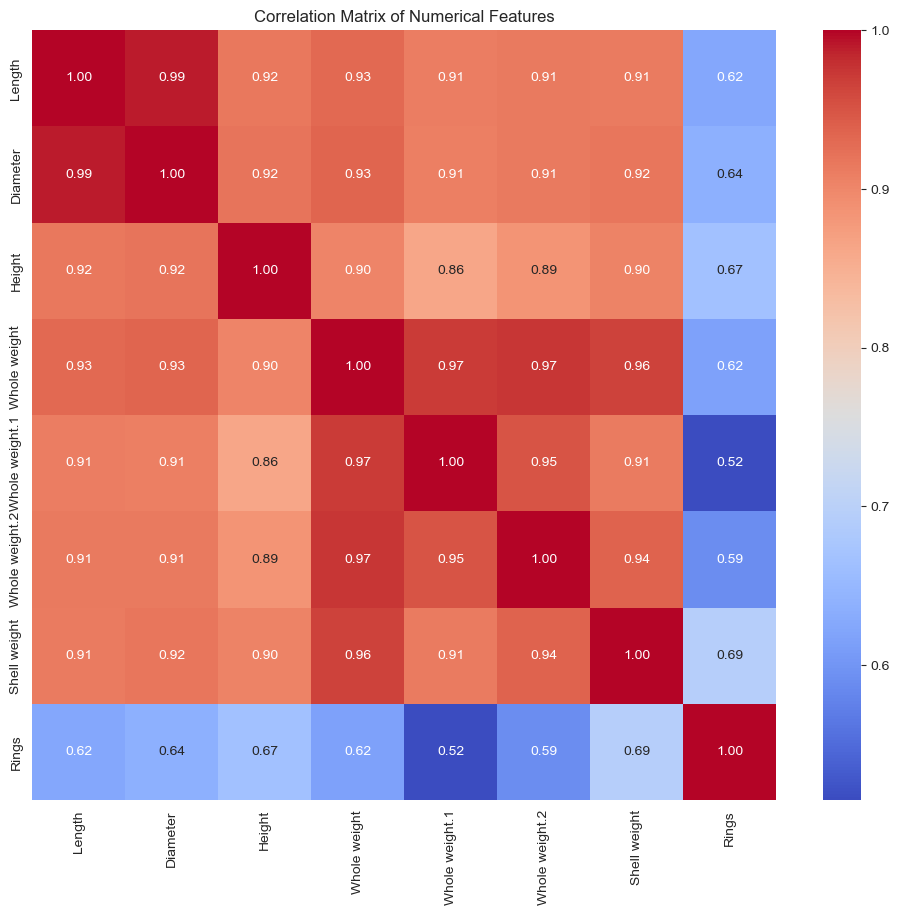

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = train_data[numerical_features + ['Rings']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Correlation Matrix Analysis

The correlation matrix of the numerical features reveals several insights:

- There is a **high correlation between physical measurements** such as `Length`, `Diameter`, `Height`, `Whole weight`, and `Shell weight`. This suggests that these features increase together as the physical size of the abalones increases.

- The target variable `Rings` shows a **moderate to high positive correlation** with all physical measurements, indicating that larger abalones tend to be older.

- The **strong correlations between predictors** suggest potential multicollinearity issues, which could affect model estimation and interpretability.

Given these findings, we might consider using regularization techniques or tree-based models that can handle multicollinearity in our predictive modeling.



In [25]:
 #Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
sex_encoded = encoder.fit_transform(train_data[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))

# Combine encoded features with the rest, dropping the original 'Sex' column
train_data_encoded = pd.concat([train_data.drop('Sex', axis=1), sex_encoded_df], axis=1)

# Standardizing numerical features
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']  # assuming these are the names
scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])

# Add volume and polynomial features
train_data_encoded['Volume'] = train_data_encoded['Length'] * train_data_encoded['Diameter'] * train_data_encoded['Height']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(train_data_encoded[numerical_features + ['Volume']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features + ['Volume']))
train_data_encoded = pd.concat([train_data_encoded, poly_features_df], axis=1)


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
#Split the dataset into training and validation sets

X = train_data_encoded.drop('Rings', axis=1)
y = train_data_encoded['Rings']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop('id', axis=1)
X_val = X_val.drop('id', axis=1)
# Create a pipeline for preprocessing and model training
# Using StandardScaler for scaling all numeric features
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define models to train
models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_val, y_val):
    results = {}
    for name, model in models.items():
        # Combine preprocessor and model in a single pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        pipeline.fit(X_train, y_train)  # Fit model
        
        # Evaluate the model using RMSLE
        y_pred = pipeline.predict(X_val)
        rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))  # Calculate RMSLE
        results[name] = rmsle
        print(f'{name}: Validation RMSLE = {rmsle}')
    
    return results

# Train and evaluate all models
results = train_and_evaluate(models, X_train, y_train, X_val, y_val)

# Select the best model based on RMSLE (example using RandomForest)
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
best_model.fit(X, y)  # Fit on the entire dataset including both train and validation

Ridge: Validation RMSLE = 0.15862464009069768
RandomForest: Validation RMSLE = 0.1561798400916887
GradientBoosting: Validation RMSLE = 0.15570043605216946


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('model', RandomForestRegressor(random_state=42))])

In [36]:
# Assume 'test_data' is loaded and needs to be preprocessed similarly to 'train_data'

# Encoding categorical variables using the same encoder
sex_encoded_test = encoder.transform(test_data[['Sex']])
sex_encoded_test_df = pd.DataFrame(sex_encoded_test, columns=encoder.get_feature_names_out(['Sex']))

# Combining the encoded 'Sex' column back with the rest of test_data
test_data_encoded = pd.concat([test_data.drop('Sex', axis=1), sex_encoded_test_df], axis=1)

# Applying the same scaling to numerical features
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

# Add volume and polynomial features to the test data
test_data_encoded['Volume'] = test_data_encoded['Length'] * test_data_encoded['Diameter'] * test_data_encoded['Height']

# Generating polynomial features for the test data using the same PolynomialFeatures instance
poly_features_test = poly.transform(test_data_encoded[numerical_features + ['Volume']])
poly_features_test_df = pd.DataFrame(poly_features_test, columns=poly.get_feature_names_out(numerical_features + ['Volume']))

# Combine the original test data (now with encoded and scaled features) with the new polynomial features
test_data_encoded = pd.concat([test_data_encoded, poly_features_test_df], axis=1)

# Now `test_data_encoded` is ready to be used for making predictions with your trained model


In [41]:
# Ensure the 'id' column is dropped before training
X_train = X_train.drop('id', axis=1, errors='ignore')
X_val = X_val.drop('id', axis=1, errors='ignore')

# Reinitialize and retrain the model
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

best_model.fit(X_train, y_train)  # Train on the corrected feature set

# Predict using the corrected model
# Ensure the test data also has the 'id' column removed before prediction
test_data_processed = test_data_encoded.drop('id', axis=1, errors='ignore')
test_predictions = best_model.predict(test_data_processed)

# Create submission file
submission_df = pd.DataFrame({
    'id': test_data_encoded['id'],  # Assume 'id' is correctly retained for submission reference
    'Rings': test_predictions
})
submission_df.to_csv('submission.csv', index=False)
print("Submission file created successfully!")


Submission file created successfully!
